In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow import keras
print(tf.__version__)

2.0.0


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(len(x_train))
print(x_train[0], y_train[0])

60000
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         

In [ ]:
#shorten
#x_train = x_train[:100]
#y_train = y_train[:100]
#print(len(x_train))

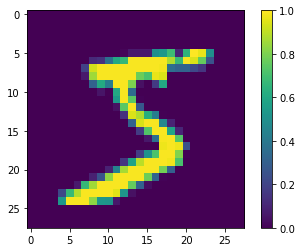

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


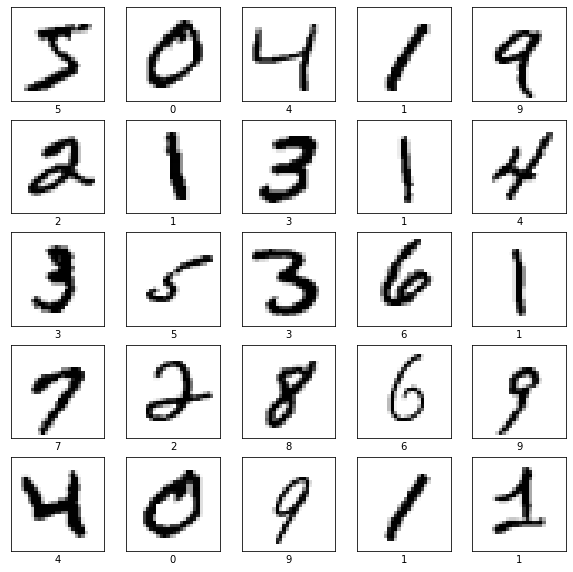

In [5]:
plt.figure(figsize=(10,10))
#plt.colorbar()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
#random forest
#model_rf = tf.estimator.BoostedTreesClassifier(
#    x_train, len(x_train)/10, n_classes=10,
#    n_trees=100, max_depth=6
#    )

In [10]:
#keras model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 1.5840 - accuracy: 0.8939
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 1.5222 - accuracy: 0.9449
Epoch 3/5
60000/60000 [==============================] - 8s 127us/sample - loss: 1.5089 - accuracy: 0.9565
Epoch 4/5
60000/60000 [==============================] - 8s 131us/sample - loss: 1.5014 - accuracy: 0.9631
Epoch 5/5
60000/60000 [==============================] - 8s 134us/sample - loss: 1.4969 - accuracy: 0.9674


In [13]:
model.evaluate(x_test, y_test)

[1.4930029712677002, 0.9702]

In [ ]:
model.save('../../model/mnist/202012-mnist-classifier-1')